Epoch 1/20
215/215 [==============================] - 13s 52ms/step - loss: 3.2827 - accuracy: 0.0414 - val_loss: 3.2627 - val_accuracy: 0.0472
Epoch 2/20
215/215 [==============================] - 10s 48ms/step - loss: 3.1809 - accuracy: 0.0677 - val_loss: 3.0363 - val_accuracy: 0.0879
Epoch 3/20
215/215 [==============================] - 10s 46ms/step - loss: 2.9932 - accuracy: 0.0878 - val_loss: 2.8945 - val_accuracy: 0.0971
Epoch 4/20
215/215 [==============================] - 10s 46ms/step - loss: 2.8599 - accuracy: 0.1143 - val_loss: 2.8537 - val_accuracy: 0.1142
Epoch 5/20
215/215 [==============================] - 10s 46ms/step - loss: 2.7104 - accuracy: 0.1519 - val_loss: 2.7779 - val_accuracy: 0.1444
Epoch 6/20
215/215 [==============================] - 10s 46ms/step - loss: 2.5385 - accuracy: 0.1896 - val_loss: 2.7593 - val_accuracy: 0.1562
Epoch 7/20
215/215 [==============================] - 10s 47ms/step - loss: 2.3909 - accuracy: 0.2171 - val_loss: 2.7671 - val_accuracy:

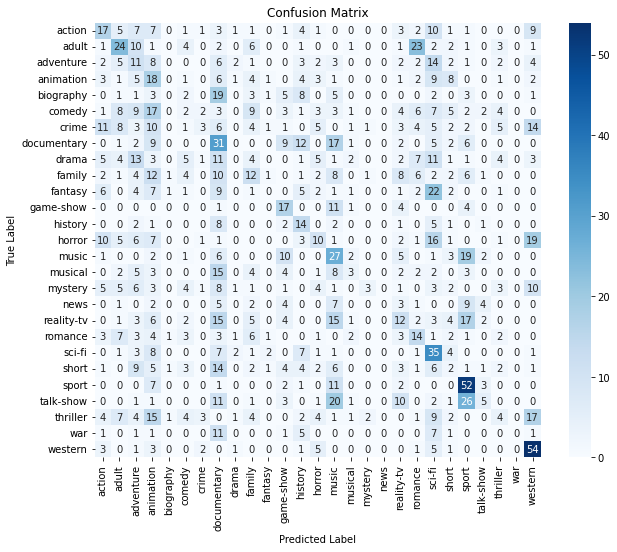

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

data = pd.read_csv('/Users/sandundesilva/Documents/4th year/Research Project/UI/findMyFilm/flask-server/Models/final/GenreDataset/Final_movie_train.csv')

X = data['subtitles']
y = pd.get_dummies(data['genre'])

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

maxlen = 100
X_pad = pad_sequences(X_seq, maxlen=maxlen)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y.columns), activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
